# Classifying musical instruments

Here we attempt to classify instruments into any 3 categories. 

* Flute
* Guitar
* Drums

## Setup

Load data and clean

In [1]:
from fastai.vision import *

In [3]:
folder_list = ['flute','guitar','drums']
file_list = ['urls_flute.txt','urls_guitar.txt','urls_drums.txt']

for folder, file in zip(folder_list,file_list):
    
    path = Path('data/instruments')
    
    # Make the folder directory
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    
    # Download the images
    download_images(path/file, dest, max_pics=1000)

Error https://www.trevadamusic.co.uk/upload/woodwind/Flute/2FL511EJS.jpg HTTPSConnectionPool(host='www.trevadamusic.co.uk', port=443): Max retries exceeded with url: /upload/woodwind/Flute/2FL511EJS.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'ssl3_get_server_certificate', 'certificate verify failed')],)",),))


Error https://www.kieselguitars.com/customshop/images/700-v6.jpg Exceeded 30 redirects.


In [10]:
# Verify the images
classes = folder_list

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

flute


guitar


drums


In [11]:
# Put data into data bunch
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

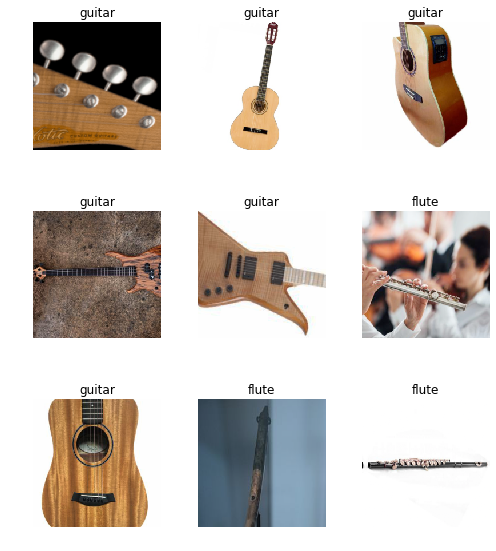

In [12]:
data.show_batch(rows=3, figsize=(7,8))

## Machine learning bit

Here we do some machine learning to classify the images.

In [13]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.642232,0.088018,0.027668
2,0.346298,0.056563,0.015810
3,0.218747,0.048042,0.015810
4,0.160960,0.048663,0.019763


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

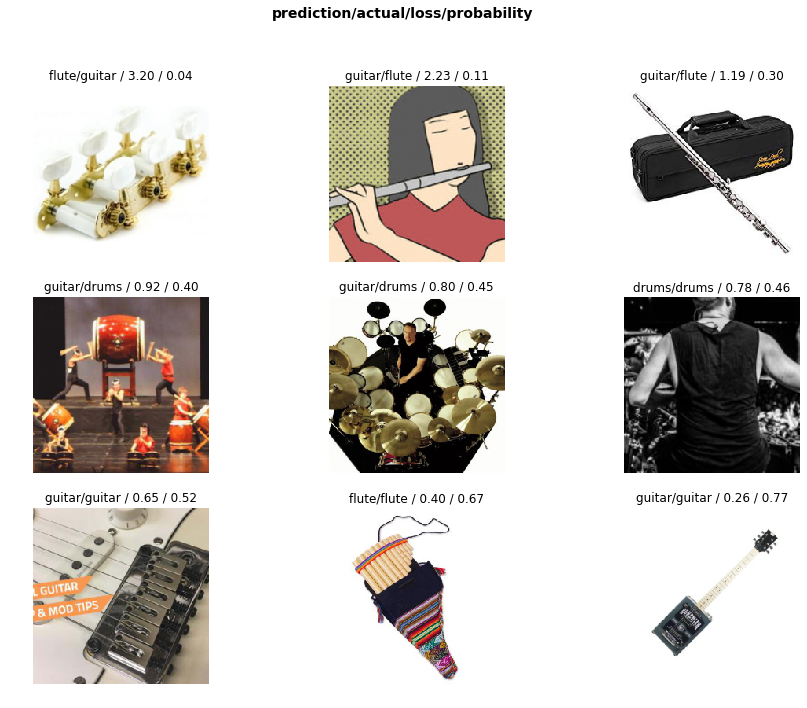

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

## Putting model into production

Now let's try to put this model into production with starlette. 

In [17]:
learn.export()

In [18]:
defaults.device = torch.device('cpu')

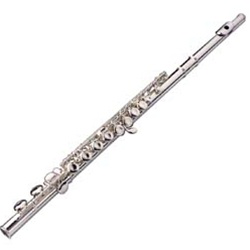

In [19]:
img = open_image(path/'flute'/'00000021.jpg')
img

In [20]:
learn = load_learner(path)

In [21]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category flute

In [22]:
??get_bytes

Object `get_bytes` not found.
